In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we create

# Read the data
movies = pd.read_csv('movies.csv')


#To look at all your data
pd.set_option('display.max_rows', None)



In [2]:
# Data Cleaning
# Identify null values and fill with 0
movies = movies.fillna(0)


In [3]:
# Spliting the Year from Released column
s = movies['released'].str.split('\(')

movies['released'] = s.str[0]
movies['Country_Released'] =s.str[1].astype(str).str[:-1]

movies['yearcorrected'] = movies['released'].astype(str).str[-5:]


In [4]:
#Order the table showing the highest movie by Gross revenue

movies.sort_values(by=['gross'],inplace=False, ascending = False).head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Country_Released,yearcorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,United States,2018


In [5]:

# Drop the duplicates
movies['name'].drop_duplicates().sort_values(ascending=False).head()


4722                      Æon Flux
4761       xXx: State of the Union
7112    xXx: Return of Xander Cage
4083                           xXx
3503                      eXistenZ
Name: name, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

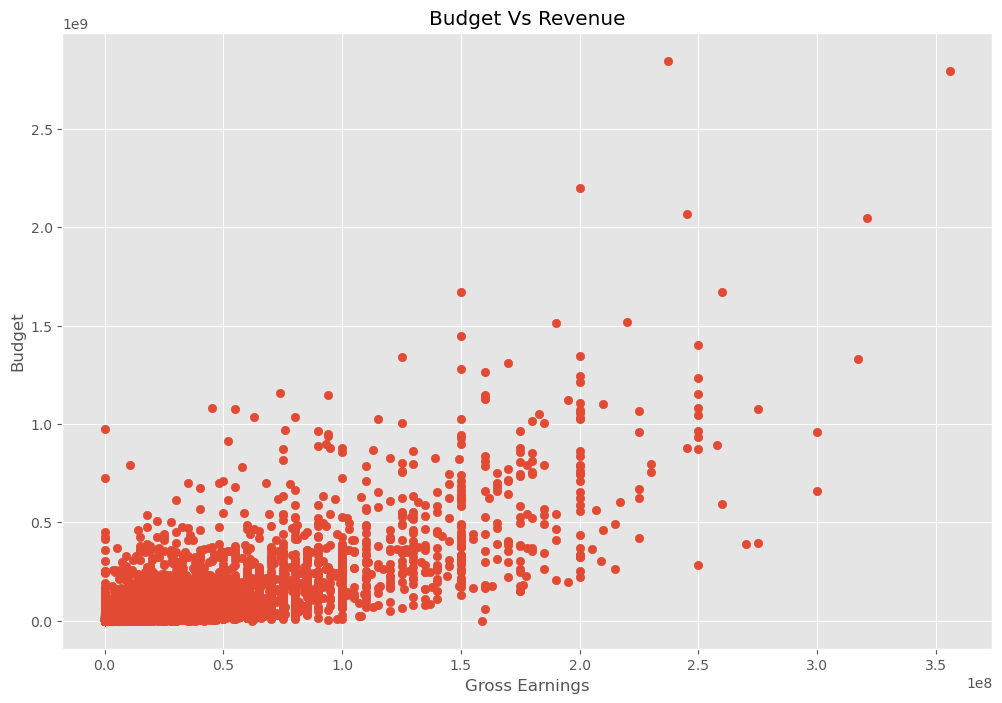

In [6]:
#Check for correlation in the data between different columns
#Like More the Budget more revenue

#build a scatter plot from budget anbd revenue

plt.scatter(x = movies['budget'],y = movies['gross'])
plt.title('Budget Vs Revenue')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

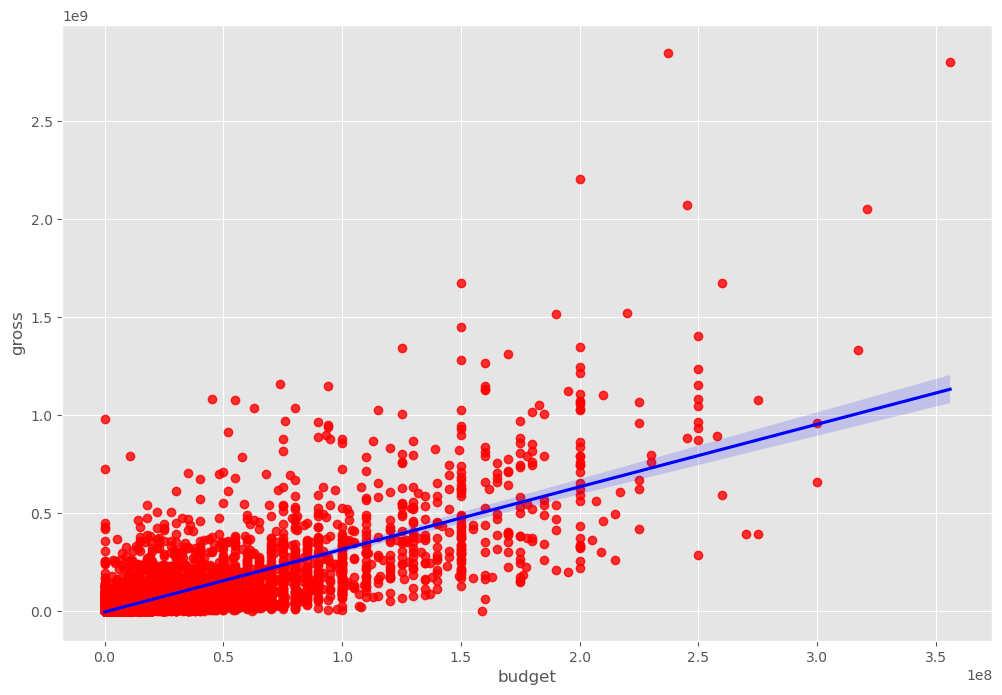

In [7]:
#Plot the Bugest Vs Revenue with seaborn
sns.regplot(x = 'budget',y = 'gross', data = movies, scatter_kws = {"color" : "red"}, line_kws = {"color":"blue"})

In [8]:
corr_matrix = movies.corr(numeric_only=True) #methods - pearson,kendall,spearman
corr_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


Text(120.72222222222221, 0.5, 'Movie Features')

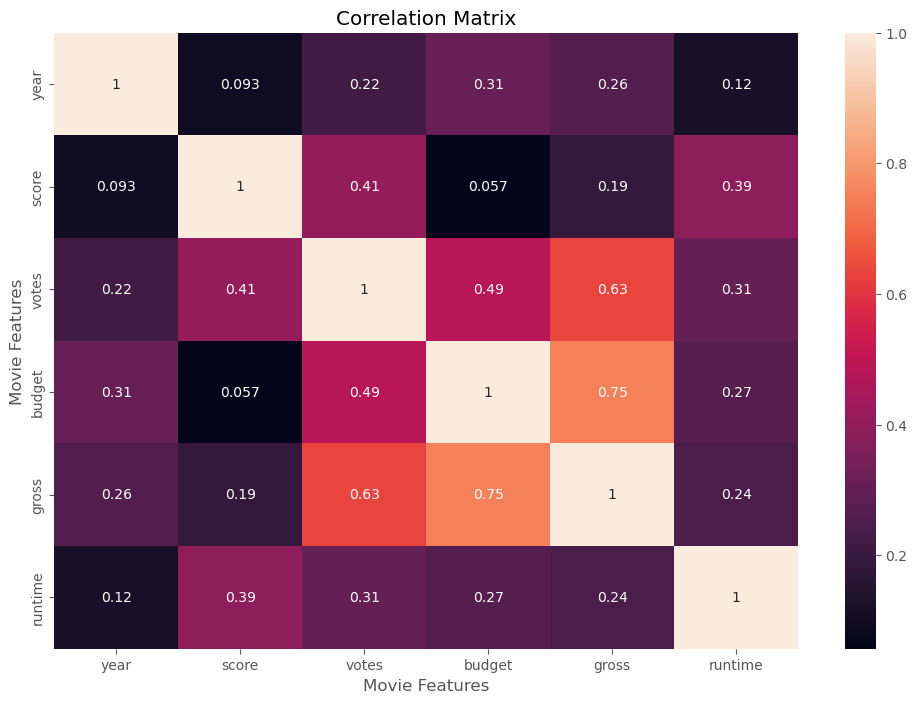

In [9]:
#Visualize the correlation matrix

sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

Text(120.58159722222221, 0.5, 'Movie Features')

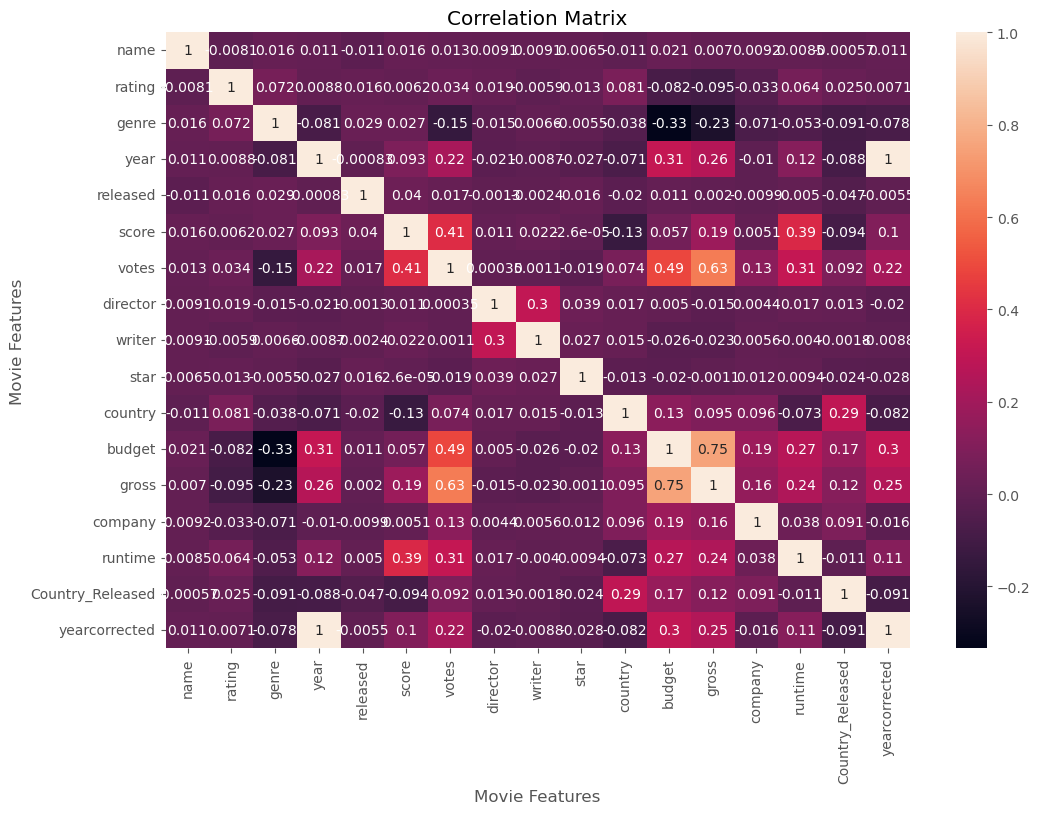

In [10]:
movies_numerized = movies

for col_name in movies_numerized.columns:
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name] = movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes

# The dataframe movies had very few columns as numeric, now we have converted most of teh columns as numeric, thus the correlation ,matriox will have more values.

corr_matrix = movies_numerized.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

       

In [11]:
# As there are a lot of values, we may arrage in descending order of their correlation value
correlation_mat = movies_numerized.corr(numeric_only=True)

corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre             budget             -0.334021
budget            genre              -0.334021
gross             genre              -0.234297
genre             gross              -0.234297
votes             genre              -0.145296
genre             votes              -0.145296
country           score              -0.133346
score             country            -0.133346
rating            gross              -0.095450
gross             rating             -0.095450
score             Country_Released   -0.094112
Country_Released  score              -0.094112
yearcorrected     Country_Released   -0.090884
Country_Released  yearcorrected      -0.090884
genre             Country_Released   -0.090843
Country_Released  genre              -0.090843
year              Country_Released   -0.088273
Country_Released  year               -0.088273
yearcorrected     country            -0.082274
country           yearcorrected      -0.082274
budget            rating             -0.081939
rating       